## Computer Vision Libraries in PyTorch

* `torchvision` - base domain library for PyTorch Computer Vision
* `torchvision.datasets` - get datasets and data loading functions for cmoputer vision here
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


## Getting a dataset

Try using the FashionMNIST dataset from `torchvision.datasets`


In [ ]:
#  Setup training data
train_data = datasets.FashionMNIST(
    root='data', # where to download the data to?
    train=True, # do we want the training dataset? If set to false, it will download the testing dataset
    download=True, # do we want to download yes/no
    transform=ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the label/target?
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15904598.44it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 273060.88it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5043233.24it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21336242.09it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
for i in range(2):
  print(train_data[i])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000

In [ ]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
# Check the shape of our image
print(f"Image Shape (Color Chanel, Height, Width): {image.shape}")
print(f"Image Label: {class_names[label]}")

Image Shape (Color Chanel, Height, Width): torch.Size([1, 28, 28])
Image Label: Ankle boot


### Visualizing the data

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

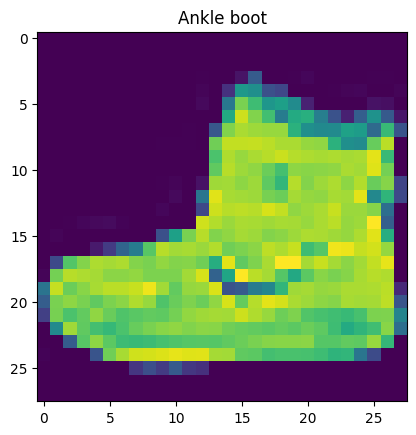

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

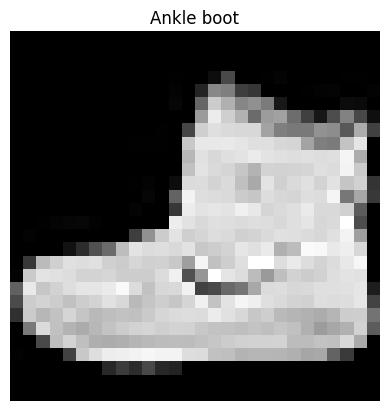

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

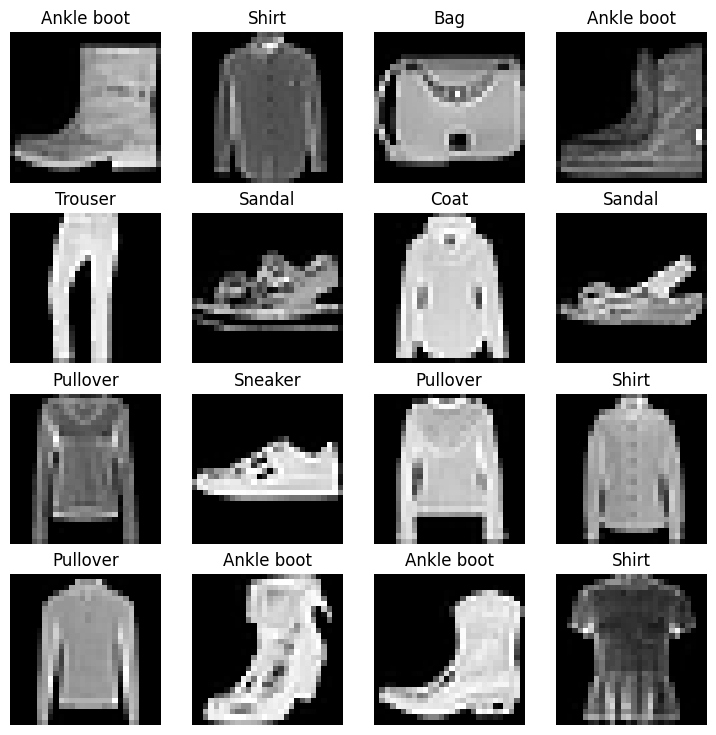

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

Can these images could be modelled with pure linear lines? or do we need non-linearities?

## Prepare DataLoader

Right now, the data is in the form of PyTorch Datasets. We want to transform our datasets format into DataLoader

DataLoader turns our dataset into a Python iterable datasets

More specifically, we want to turn our data into batches (or mini-batches)

Why?

1. It is more computationally efficient, as in our computing hardware may not be able to look (sotre in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradient per epoch.

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b2443684c40>,
 <torch.utils.data.dataloader.DataLoader at 0x7b2443684c70>)

In [ ]:
# Let's checkout what we've created
print(f"Data Loaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Data Loaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b2443684c40>, <torch.utils.data.dataloader.DataLoader object at 0x7b2443684c70>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size: torch.Size([1, 28, 28])
Label: 6


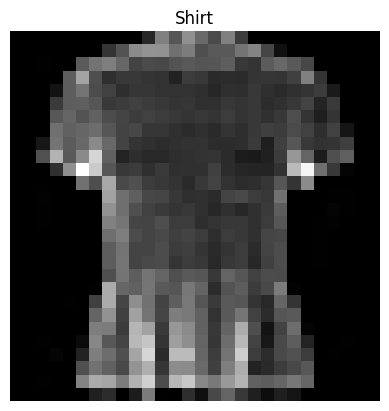

In [ ]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label - train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label: {label}")

## Model 0: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [Color Chanel, Height, Width]")
print(f"Shape after flattening: {output.shape} -> [Color Chanel, Height*Width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [Color Chanel, Height, Width]
Shape after flattening: torch.Size([1, 784]) -> [Color Chanel, Height*Width]


In [ ]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input: int,
               hidden_units:int,
               output: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(input=784, hidden_units=10, output=len(class_names))
model_0.to('cpu')

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Setup loss, optimizer and evaluation metrics

* Loss function - since we're working with multiclass data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (Stochastic Gradient Descent)
* Evaluation Metric - since we're working on a classification problem, we're gonna use accuracy as the evaluation metrics

In [ ]:
import requests
from pathlib import Path

# Download helper functions
if Path('helper_functions.py').is_file():
  print("Already Exists!")
else:
  print("Downloading!")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

Downloading!


In [ ]:
# Import accuracy metrics from the helper functions
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### Creating a function to time the experiments

Machine learning is very experimental

Two of the main things we'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [ ]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device: torch.device=None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

Train time on cpu: 0.000 seconds


2.594499994756916e-05

### Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss *per batch*.
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*.
4. Print out what's happening
5. Time it all(for fun lol)

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (keep it small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # Forward Pass
    train_preds = model_0(X)

    # Calculate Loss
    loss = loss_fn(train_preds, y)
    train_loss += loss # accumulate train loss

    # Optimizer Zero Grad
    optimizer.zero_grad()

    # Backprop
    loss.backward()

    # Gradient Descent
    optimizer.step()

    # Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # Forward Pass
      test_pred = model_0(X_test)

      # Calculate loss
      test_loss += loss_fn(test_pred, y_test)

      # Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test Loss: {test_loss:4f}, Test Accuracy: {test_acc:.2f}%")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test Loss: 0.509535, Test Accuracy: 82.04%
Epoch: 1
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test Loss: 0.479890, Test Accuracy: 83.20%
Epoch: 2
------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test Loss: 0.476639, Test Accuracy: 83.43%
Train time on cpu: 26.936 seconds


In [ ]:
next(model_0.parameters()).device

device(type='cpu')

## Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """ Returns a dictionary containing the results of model predicting on Data Loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Send data to target device
      X, y = X.to(device), y.to(device)
      model = model.to(device)
      # Make predictions
      y_pred = model(X)

      # Calculate loss and accuracy per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and accuracy to find the average loss/accuracy per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"Model_Name": model.__class__.__name__, # only works when model was created with a class
          "Model_Loss": loss.item(),
          "Model_Acc": acc}

## Setup device agnostic code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Model 1: Building a better model with non-linearity

In [ ]:
# Create a model with linear and non-linear layers
torch.manual_seed(42)

class FashionMNISTModelV1(nn.Module):
  def __init__(self, input:int, output:int, hidden_units:int):
    super().__init__()
    self.model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output)
    ).to(device)

  def forward(self, x):
    return self.model(x)

model_1 = FashionMNISTModelV1(input=28*28, output=len(class_names), hidden_units=10)
model_1

FashionMNISTModelV1(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

### Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### Functionizing training and testing loops

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """ Performs a training loop for model trying to learn on data_loader"""
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # Forward Pass
    train_preds = model(X)

    # Calculate Loss
    loss = loss_fn(train_preds, y)
    train_loss += loss # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=train_preds.argmax(dim=1))

    # Optimizer Zero Grad
    optimizer.zero_grad()

    # Backprop
    loss.backward()

    # Gradient Descent
    optimizer.step()

  # Divide total train loss and accuracy by length of train dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train Loss: {train_loss:.5f}, Train Accuracy: {train_acc:.2f}%")

In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: loss_fn,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop for model going over data_loader"""
  test_loss, test_acc = 0, 0

  # Set model into eval mode and inference mode
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # Forward pass
      test_pred = model(X)

      # Calculate loss and accuracy
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
start_timer_on_gpu = timer()

# Set epochs
epochs = 3

# Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model_1,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn, device)

  test_step(model_1,
            test_dataloader,
            loss_fn,
            accuracy_fn, device)

end_timer_on_gpu = timer()
total_train_time_model_1 = print_train_time(start_timer_on_gpu, end_timer_on_gpu, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Train Loss: 0.66768, Train Accuracy: 75.88%
Test Loss: 0.50092, Test Accuracy: 82.09%
Epoch: 1
------------
Train Loss: 0.48344, Train Accuracy: 82.77%
Test Loss: 0.48896, Test Accuracy: 82.69%
Epoch: 2
------------
Train Loss: 0.44955, Train Accuracy: 83.87%
Test Loss: 0.48580, Test Accuracy: 82.89%
Train time on cuda: 34.580 seconds


In [ ]:
print(total_train_time_model_0)
print(total_train_time_model_1)

26.93581963400004
34.58014179600002


**Note:** Sometimes, depending on your data/hardware you might find that your model trians faster on CPU than GPU.

Why?

1. It could be that the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU
2. The hardware you're using has a better CPU in terms of compute capability than the GPU

In [ ]:
model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn, device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn, device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_0_results

{'Model_Name': 'FashionMNISTModelV0',
 'Model_Loss': 0.47663894295692444,
 'Model_Acc': 83.42651757188499}

In [ ]:
model_1_results

{'Model_Name': 'FashionMNISTModelV1',
 'Model_Loss': 0.4858045279979706,
 'Model_Acc': 82.8873801916933}

### Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find pattern in visual data

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN Explainer website.
  """
  def __init__(self, input:int, output:int, hidden_units:int):
    super().__init__()
    self.convolution_block_1 = nn.Sequential(
        # Create a Conv Layer
        nn.Conv2d(in_channels=input,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # These are all hyperparams
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.convolution_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick on how to determine the in_features for linear layer after convolutional
                  out_features=output)
    )

  def forward(self, x):
    x = self.convolution_block_1(x)
    #print(x.shape)
    x = self.convolution_block_2(x)
    #print(x.shape)
    x = self.classifier_layer(x)
    #print(x.shape)
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input=1, output=len(class_names) , hidden_units=10).to(device)
model_2

FashionMNISTModelV2(
  (convolution_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convolution_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2.state_dict()

OrderedDict([('convolution_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              

In [ ]:
# Pass Image through model
model_2(image.unsqueeze(0).to(device))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], device='cuda:0', grad_fn=<AddmmBackward0>)

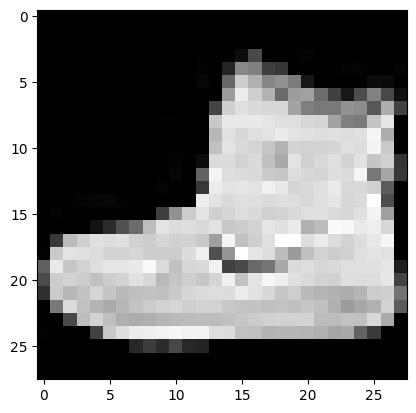

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')

In [ ]:
image.shape

torch.Size([1, 28, 28])

### Stepping through `nn.Conv2d()`

In [ ]:
torch.manual_seed(42)

# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test Image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test Image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=1)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output
conv_output.shape

torch.Size([10, 64, 64])

### Stepping through `nn.MaxPool2d()`

In [ ]:
maxpool_layer = nn.MaxPool2d(kernel_size=2)
maxpool_output = maxpool_layer(conv_output)
maxpool_output.shape

torch.Size([10, 32, 32])

### Setup a loss function and optimizer for `model_2`

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### Training and testing `model_2` using the training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----------")
  train_step(model_2,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)
  test_step(model_2,
            test_dataloader,
            loss_fn,
            accuracy_fn,
            device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2,
                                            train_time_end_model_2,
                                            device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-----------
Train Loss: 0.59425, Train Accuracy: 78.51%
Test Loss: 0.40080, Test Accuracy: 85.83%
Epoch: 1
-----------
Train Loss: 0.36212, Train Accuracy: 86.88%
Test Loss: 0.35199, Test Accuracy: 87.17%
Epoch: 2
-----------
Train Loss: 0.32559, Train Accuracy: 88.16%
Test Loss: 0.32249, Test Accuracy: 88.29%
Epoch: 3
-----------
Train Loss: 0.30445, Train Accuracy: 88.95%
Test Loss: 0.32352, Test Accuracy: 88.06%
Epoch: 4
-----------
Train Loss: 0.28886, Train Accuracy: 89.57%
Test Loss: 0.30693, Test Accuracy: 88.99%
Train time on cuda: 59.786 seconds


In [ ]:
model_2.state_dict()

OrderedDict([('convolution_block_1.0.weight',
              tensor([[[[ 0.3422,  0.3118, -0.5151],
                        [ 0.0312,  0.2649, -0.0966],
                        [-0.4113,  0.2028,  0.4928]]],
              
              
                      [[[-0.5238,  0.4630, -0.0140],
                        [ 0.0967,  0.3304,  0.0986],
                        [ 0.1510,  0.1967,  0.0331]]],
              
              
                      [[[-0.3394, -0.1511,  0.0033],
                        [-0.8070, -0.7432,  0.1649],
                        [-0.8963, -0.7673, -0.2286]]],
              
              
                      [[[-0.9115, -1.3175, -0.7971],
                        [ 0.1963, -0.8947,  0.1075],
                        [ 0.2646,  0.0030,  0.4465]]],
              
              
                      [[[ 0.0747,  0.4791,  0.0986],
                        [-0.1471,  0.3673, -0.0125],
                        [ 0.0077,  0.3473,  0.1659]]],
              
              

In [ ]:
# Get model_2 results
model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn, device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'FashionMNISTModelV2',
 'Model_Loss': 0.3069332242012024,
 'Model_Acc': 88.9876198083067}

## Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])

compare_results

,Model_Name,Model_Loss,Model_Acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.485805,82.887380
2,FashionMNISTModelV2,0.306933,88.987620


In [ ]:
# Add training time to results comparison
compare_results['training_time(s)'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,Model_Name,Model_Loss,Model_Acc,training_time(s)
0,FashionMNISTModelV0,0.476639,83.426518,26.935820
1,FashionMNISTModelV1,0.485805,82.887380,34.580142
2,FashionMNISTModelV2,0.306933,88.987620,59.786232


In [ ]:
# Add device to results comparison
compare_results['device used'] = [next(model_0.parameters()).device,
                                  next(model_1.parameters()).device,
                                  next(model_2.parameters()).device]

compare_results

,Model_Name,Model_Loss,Model_Acc,training_time(s),device used
0,FashionMNISTModelV0,0.476639,83.426518,26.935820,cuda:0
1,FashionMNISTModelV1,0.485805,82.887380,34.580142,cuda:0
2,FashionMNISTModelV2,0.306933,88.987620,59.786232,cuda:0


Text(0, 0.5, 'Model')

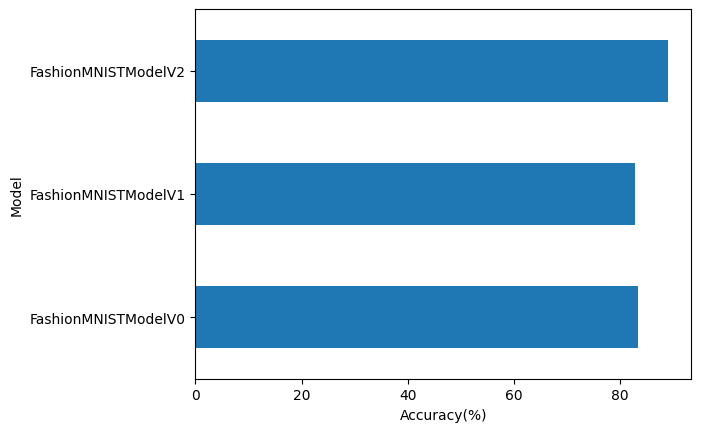

In [ ]:
# Visualize the model results
compare_results.set_index('Model_Name')['Model_Acc'].plot(kind='barh')
plt.xlabel('Accuracy(%)')
plt.ylabel('Model')

## Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device) e.g [1,28,28] to [1,1,28,28]
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward Pass (model outputs will be raw logits)
      pred_logits = model(sample)

      # Get the predictions probabilities (logits -> pred probs) since it's multiclass we use softmax activation and argmax
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into tensor
  return torch.stack(pred_probs)

In [ ]:
import random
#random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

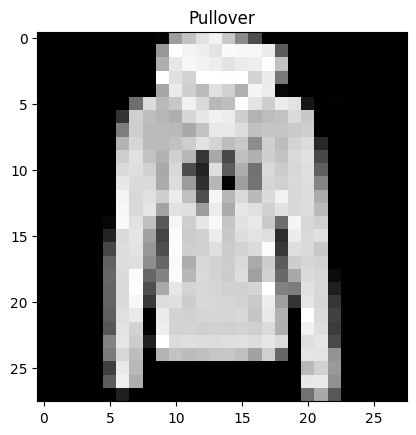

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model_2, test_samples)

# View first two prediction probabilities
pred_probs[:2]

tensor([[9.3568e-04, 8.9625e-05, 7.0366e-01, 5.1091e-05, 2.9461e-01, 3.2839e-07,
         6.4795e-04, 3.6861e-06, 1.0111e-05, 3.6517e-07],
        [3.1539e-04, 9.9867e-01, 1.4344e-06, 8.4626e-04, 1.2831e-04, 7.6109e-07,
         3.2281e-05, 3.4123e-07, 1.1187e-06, 8.1434e-07]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 0, 0, 1, 9, 6, 7, 9])

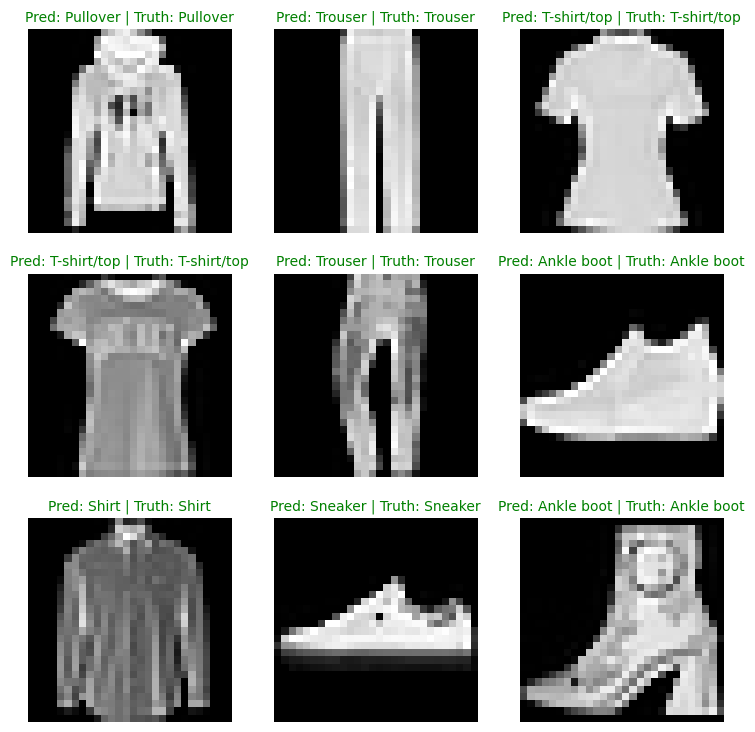

In [ ]:
# Plot Predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample, in enumerate(test_samples):
  # Create a subplot for each sample
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap='gray')

  # Find the prediction lables (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False)

## Making a confusion matrix for further prediction evaluation

Confusion matrix is a fantastic way of evaluation your classification model visually

Steps:
1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusin matrix using `mlxtend.plotting.plot_confusion_matrix()`

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

# Make Predictions with trained model (model_2)
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc='Making Predictions...'):
    # Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn Pred Logits into Pred Probs into Pred Labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # Put predictions on CPU for eval
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making Predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 0, 1, 2])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
# See if required packages are installed and if not, install them
try:
  import torchmetrics, mlxtend
  print(f'Mlxtend version: {mlxtend.__version__}')
  assert int(mlxtend.__version__.split(".")[1] >= 19), 'Mlxtend version should be 0.19.0 or higher'
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f'Mlxtend version: {mlxtend.__version__}')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 761.3/761.3 kB 8.0 MB/s eta 0:00:00
Mlxtend version: 0.22.0


In [ ]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

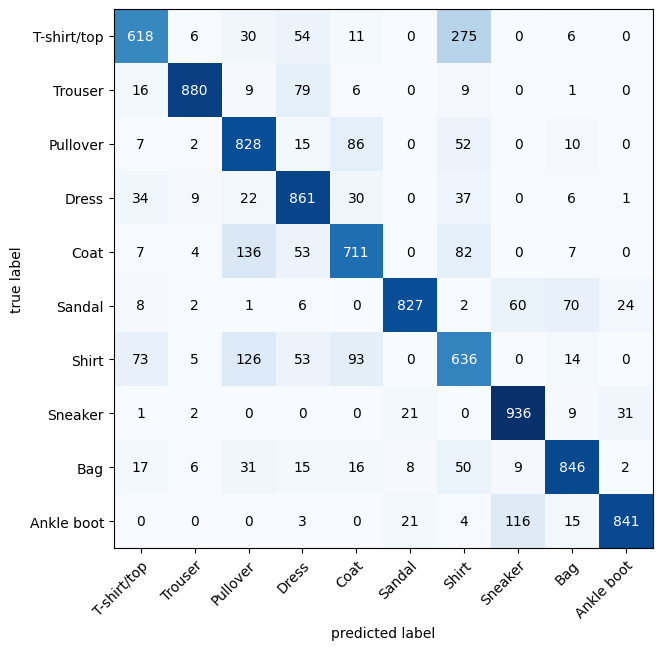

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

In [ ]:
confmat_tensor

tensor([[618,   6,  30,  54,  11,   0, 275,   0,   6,   0],
        [ 16, 880,   9,  79,   6,   0,   9,   0,   1,   0],
        [  7,   2, 828,  15,  86,   0,  52,   0,  10,   0],
        [ 34,   9,  22, 861,  30,   0,  37,   0,   6,   1],
        [  7,   4, 136,  53, 711,   0,  82,   0,   7,   0],
        [  8,   2,   1,   6,   0, 827,   2,  60,  70,  24],
        [ 73,   5, 126,  53,  93,   0, 636,   0,  14,   0],
        [  1,   2,   0,   0,   0,  21,   0, 936,   9,  31],
        [ 17,   6,  31,  15,  16,   8,  50,   9, 846,   2],
        [  0,   0,   0,   3,   0,  21,   4, 116,  15, 841]])

## Save and Load the best performing model

In [ ]:
from pathlib import Path

# Create model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save path
MODEL_NAME = 'FashionMNISTFinalModel.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/FashionMNISTFinalModel.pth


In [ ]:
image_shape = [1,28,28]

In [ ]:
# Create new instance to load model
torch.manual_seed(42)

loaded_model = FashionMNISTModelV2(input=1,
                                   hidden_units=10,
                                   output=len(class_names))

# Load in the save state_dict()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to target device
loaded_model.to(device)

FashionMNISTModelV2(
  (convolution_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convolution_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'Model_Name': 'FashionMNISTModelV2',
 'Model_Loss': 0.3069332242012024,
 'Model_Acc': 88.9876198083067}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(model=loaded_model,
                                   data_loader=test_dataloader,
                                   loss_fn=loss_fn,
                                   accuracy_fn=accuracy_fn)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_Name': 'FashionMNISTModelV2',
 'Model_Loss': 0.3069332242012024,
 'Model_Acc': 88.9876198083067}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results['Model_Loss']),
              torch.tensor(loaded_model_2_results['Model_Loss']),
              atol=1e-2)

tensor(True)